# Support Vector Regression /  Destek Vektör Regresyonu

In [1]:
#küpütphaneler aktifleştirilir
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection

from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
#veriler okunur ve test ve eğitim için ayrılır
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [4]:
#veriler data frame formuna çevrilir
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [5]:
from sklearn.svm import SVR

In [7]:
#model fit edilir
svr_model = SVR("linear").fit(X_train, y_train)

In [8]:
#tehmin değerileri alınır
svr_model.predict(X_train)[0:5]

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756])

In [9]:
#svr modelini formulize edilmiş hali yazılır
print ("y = {0} + {1} x".format(svr_model.intercept_[0], 
                                svr_model.coef_[0][0])) 


y = -48.69756097561513 + 4.969512195122093 x


In [10]:
X_train["Hits"][0:1]

183    91.0
Name: Hits, dtype: float64

Yukarıdaki çıktıdan ilk eğitim verisinin 91 olduğunu anlıyoruz. Tahmin işleminde de ilk veri için sonucun 403.52 olduğunu bulmuştuk. Az önce bastırdığımız formül ile bu değerleri bir deneyelim!

In [11]:
-48.69756097561513 + 4.969512195122093*91

403.5280487804953

Görüldüğü üzere aynı sonuca ulaştık

In [13]:
y_pred = svr_model.predict(X_train)

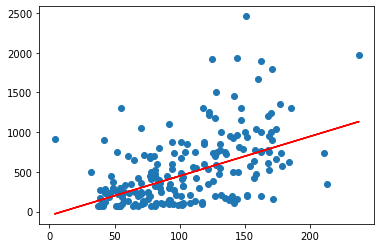

In [14]:
plt.scatter(X_train, y_train)
plt.plot(X_train,y_pred, color = "r")

In [15]:
svr_model.predict([[91]])

array([403.52804878])